In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

import numpy as np

import matplotlib.pyplot as plt

import spacy

In [ ]:
!python -m spacy download el_core_news_sm

In [68]:
start_page = 13
end_page = 15

start_url = 'https://www.newsit.gr/category/ellada/page/'

test_url = start_url + str(start_page)

In [69]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [70]:
teaser_articles_list = doc.find('main', {'id': 'main'}).find_all('article')

In [71]:
teaser_articles_list[0]

<article class="">
<div class="image has-video">
<a href="https://www.newsit.gr/ellada/giorgos-georgiou-i-poreia-pou-sfragise-tin-athlitiki-dimosiografia-kai-i-spania-astheneia-tou-giou-tou/3790333/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/georgiou-1-768x446.jpg');" title="Η μεγάλη πορεία του Γιώργου Γεωργίου στην δημοσιογραφία και η σπάνια ασθένεια του γιου του - Πότε θα γίνει η κηδεία"></a>
</div>
<div>
<div class="entry-meta mb-05">
<span class="posted-on">
<time class="entry-date published" datetime="2023-06-05T11:53:51+03:00">
<svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z"></path>
<path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-0.5,0.4v3.6c0,0.2,0,0.5,0.3,0.5l1.

In [72]:
print(teaser_articles_list[0].prettify())

<article class="">
 <div class="image has-video">
  <a href="https://www.newsit.gr/ellada/giorgos-georgiou-i-poreia-pou-sfragise-tin-athlitiki-dimosiografia-kai-i-spania-astheneia-tou-giou-tou/3790333/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/georgiou-1-768x446.jpg');" title="Η μεγάλη πορεία του Γιώργου Γεωργίου στην δημοσιογραφία και η σπάνια ασθένεια του γιου του - Πότε θα γίνει η κηδεία">
  </a>
 </div>
 <div>
  <div class="entry-meta mb-05">
   <span class="posted-on">
    <time class="entry-date published" datetime="2023-06-05T11:53:51+03:00">
     <svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
      <path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z">
      </path>
      <path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0

In [73]:
link = teaser_articles_list[0].find('a')['href']
print(link)

https://www.newsit.gr/ellada/giorgos-georgiou-i-poreia-pou-sfragise-tin-athlitiki-dimosiografia-kai-i-spania-astheneia-tou-giou-tou/3790333/


In [74]:
teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  teaser_articles_list = doc.find('main', {'id': 'main'}).find_all('article')

  for teaser in teaser_articles_list:
      story_dict = {}
      try:
        
        link = teaser.find('a')['href']
        

        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [75]:
newsit_teasers_df = pd.DataFrame(teasers_list)
newsit_teasers_df

,url
0,https://www.newsit.gr/ellada/giorgos-georgiou-...
1,https://www.newsit.gr/ellada/xakers-kai-ston-t...
2,https://www.newsit.gr/ellada/pethane-o-dimosio...
3,https://www.newsit.gr/ellada/koinonikos-touris...
4,https://www.newsit.gr/ellada/programma-panella...
5,https://www.newsit.gr/ellada/peiraias-fotia-se...
6,https://www.newsit.gr/ellada/ethniko-kentro-ai...
7,https://www.newsit.gr/ellada/panellinies-2023-...
8,https://www.newsit.gr/ellada/xania-aytes-einai...
9,https://www.newsit.gr/ellada/agiou-pneymatos-k...


In [76]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 8 Tsalla Vasilikh 5-3 6.csv', index=False)

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
article_url = 'https://www.newsit.gr/ellada/kolonos-ksespa-i-mitera-tis-12xronis-mesa-apo-ti-fylaki-an-iksera-oti-oloi-einai-viastes-den-tha-afina-na-pigainei-stin-plateia/3789570/'

In [79]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [80]:
article = doc.find('main', {'class': 'site-main'})
print(article.prettify())

<main class="site-main" id="main">
 <div class="breadcrumbs-container">
  <div class="grid-container grid-parent">
   <p id="breadcrumbs">
    <span>
     <span>
      <a href="https://www.newsit.gr/">
       <span class="home">
        NewsIT
       </span>
      </a>
      <span>
       <a href="https://www.newsit.gr/category/ellada/">
        Ελλαδα
       </a>
       <span aria-current="page" class="breadcrumb_last">
        Ξεσπα η φυλακισμενη μητερα της 12χρονης απο τον Κολωνο! «Αν ηξερα οτι ολοι ειναι βιαστες, δεν θα αφηνα να πηγαινει στην πλατεια»
       </span>
      </span>
     </span>
    </span>
   </p>
  </div>
 </div>
 <article class="post-3789570 post type-post status-publish format-standard has-post-thumbnail category-ellada tag-viasmos-anilikis tag-kolonos tag-mastropeia" id="post-3789570" itemscope="" itemtype="https://schema.org/CreativeWork">
  <div class="inside-article">
   <header class="entry-header">
    <div class="entry-meta">
     <span class="posted-on">
 

In [81]:
title = article.find('h1', {'class': 'entry-title'})
title

<h1 class="entry-title" itemprop="headline">Κολωνός: Ξεσπά η μητέρα της 12χρονης μέσα από τη φυλακή – «Αν ήξερα ότι όλοι είναι βιαστές, δεν θα άφηνα να πηγαίνει στην πλατεία»</h1>

In [82]:
date =article.find('time')['datetime']
date

'2023-06-03T21:40:31+03:00'

In [83]:
paragraphs = article.find_all('p')
paragraphs

[<p id="breadcrumbs"><span><span><a href="https://www.newsit.gr/"><span class="home">NewsIT</span></a> <span><a href="https://www.newsit.gr/category/ellada/">Ελλαδα</a> <span aria-current="page" class="breadcrumb_last">Ξεσπα η φυλακισμενη μητερα της 12χρονης απο τον Κολωνο! «Αν ηξερα οτι ολοι ειναι βιαστες, δεν θα αφηνα να πηγαινει στην πλατεια»</span></span></span></span></p>,
 <p>Σταματημό δεν έχουν οι αποκαλύψεις για την υπόθεση του βιασμού και της μαστροπείας της 12χρονης από τον <a href="https://www.newsit.gr/tags/kolonos/" rel="noopener" target="_blank">Κολωνό</a> που έχει σοκάρει τη χώρα. </p>,
 <p>Ανάμεσα στους τελευταίους οκτώ που συνέλαβε η Αστυνομία είναι και ένας πατέρας δυο παιδιών που κατηγορείται πως ήρθε σε επαφή με την ανήλικη από τον Κολωνό, την εποχή που η σύζυγός του ήταν έγκυος.</p>,
 <p class="advert-badge align-center"></p>,
 <p>«Είναι ψέματα είναι μεγάλο ψέμα ο άντρας μου γνώριζε την κοπέλα ήταν μικρή κοπέλα. Όλα τα αδέρφια της κοπέλας γνωρίζει τη μάνα του, τον 

In [84]:
p_texts_list = []                      # δημιουργία κενής λίστας για να αποθηκεύσουμε το text κάθε παραγράφου
paragraphs = article.find_all('p')     # λίστα με όλες τις παραγράφους
for p in paragraphs:                   # για κάθε μια από τις παραγράφους στη λίστα
  p_texts_list.append(p.text)          # πάρε το .text και πρόσθεσέ το στη λίστα με τα texts των παραγράφων
full_text = ' '.join(p_texts_list)     # συνένωση των texts των παραγράφων
full_text = "".join(full_text.splitlines())
full_text

'NewsIT Ελλαδα Ξεσπα η φυλακισμενη μητερα της 12χρονης απο τον Κολωνο! «Αν ηξερα οτι ολοι ειναι βιαστες, δεν θα αφηνα να πηγαινει στην πλατεια» Σταματημό δεν έχουν οι αποκαλύψεις για την υπόθεση του βιασμού και της μαστροπείας της 12χρονης από τον Κολωνό που έχει σοκάρει τη χώρα.  Ανάμεσα στους τελευταίους οκτώ που συνέλαβε η Αστυνομία είναι και ένας πατέρας δυο παιδιών που κατηγορείται πως ήρθε σε επαφή με την ανήλικη από τον Κολωνό, την εποχή που η σύζυγός του ήταν έγκυος.  «Είναι ψέματα είναι μεγάλο ψέμα ο άντρας μου γνώριζε την κοπέλα ήταν μικρή κοπέλα. Όλα τα αδέρφια της κοπέλας γνωρίζει τη μάνα του, τον πατέρα του τον γνωρίζει», δήλωσε αποκλειστικά στο κεντρικό δελτίο του Star η σύζυγος του εν λόγω συλληφθέντα, ο οποίος μένει σε πολύ κοντινή από το σπίτι του κοριτσιού. «Τους είχε δώσει και λεφτά στα μικρά τα παιδιά, τους έχει αγοράσει και παγωτά γιατί τα λυπόταν», ανέφερε χαρακτηριστικά.  «Είχανε δείξει φωτογραφία στην κοπέλα και είχανε πει “τον γνωρίζεις αυτόν τον άνθρωπο;”. Είχ

In [85]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 8 Tsalla Vasilikh 5-3 6.csv')
newsit_teasers_df.head()

,url
0,https://www.newsit.gr/ellada/giorgos-georgiou-...
1,https://www.newsit.gr/ellada/xakers-kai-ston-t...
2,https://www.newsit.gr/ellada/pethane-o-dimosio...
3,https://www.newsit.gr/ellada/koinonikos-touris...
4,https://www.newsit.gr/ellada/programma-panella...


In [86]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('main', {'class': 'site-main'})
  full_article_dict = {}
  
  # website
  full_article_dict['site'] = "newsit.gr"
  
  # url
  full_article_dict['url'] = article_url


  #title
  try:
    title = title = article.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = '' 
    pass

  # date
  try:
    date = article.find('time')['datetime']  
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # full_text
  try:
    p_texts_list = []                      
    paragraphs = article.find_all('p')    
    for p in paragraphs:                  
      p_texts_list.append(p.text)      
    full_text = ' '.join(p_texts_list)  
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text  
  except:
    full_article_dict['full_text'] = '' 
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [87]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

,site,url,title,date,full_text
0,newsit.gr,https://www.newsit.gr/ellada/giorgos-georgiou-...,Γιώργος Γεωργίου: Η πορεία που «σφράγισε» την ...,2023-06-05T11:53:51+03:00,NewsIT Ελλαδα Η μεγαλη πορεια του Γιωργου Γεωρ...
1,newsit.gr,https://www.newsit.gr/ellada/xakers-kai-ston-t...,Χάκερς και στον τουρισμό – Τι πρέπει να προσέχ...,2023-06-05T11:22:18+03:00,NewsIT Ελλαδα Χακερς και στον τουρισμο – Τι πρ...
2,newsit.gr,https://www.newsit.gr/ellada/pethane-o-dimosio...,Πέθανε ο δημοσιογράφος Γιώργος Γεωργίου,2023-06-05T10:36:22+03:00,NewsIT Ελλαδα Πεθανε ο δημοσιογραφος Γιωργος Γ...
3,newsit.gr,https://www.newsit.gr/ellada/koinonikos-touris...,Κοινωνικός Τουρισμός 2023: Λήγει τα μεσάνυχτα ...,2023-06-05T10:10:05+03:00,NewsIT Ελλαδα Ληγει σημερα τα μεσανυχτα η προθ...
4,newsit.gr,https://www.newsit.gr/ellada/programma-panella...,"Πρόγραμμα Πανελλαδικών 2023: Αρχαία Ελληνικά, ...",2023-06-05T10:01:00+03:00,NewsIT Ελλαδα Προγραμμα Πανελλαδικων 2023: Αρχ...
5,newsit.gr,https://www.newsit.gr/ellada/peiraias-fotia-se...,Πειραιάς: Φωτιά σε διαμέρισμα στα Μανιάτικα,2023-06-05T09:38:27+03:00,NewsIT Ελλαδα Φωτια σε διαμερισμα 2ου οροφου σ...
6,newsit.gr,https://www.newsit.gr/ellada/ethniko-kentro-ai...,Εθνικό Κέντρο Αιμοδοσίας: Ποια είναι τα Νοσοκο...,2023-06-05T08:53:31+03:00,NewsIT Ελλαδα Εθνικο Κεντρο Αιμοδοσιας: Ποια ε...
7,newsit.gr,https://www.newsit.gr/ellada/panellinies-2023-...,Πανελλήνιες 2023: Το πρόγραμμα και τα μαθήματα...,2023-06-05T08:23:59+03:00,NewsIT Ελλαδα Το προγραμμα των Πανελληνιων της...
8,newsit.gr,https://www.newsit.gr/ellada/xania-aytes-einai...,Χανιά: Αυτές είναι οι καλύτερες παραλίες που π...,2023-06-05T07:33:00+03:00,NewsIT Ελλαδα Χανια: Αυτες ειναι οι καλυτερες ...
9,newsit.gr,https://www.newsit.gr/ellada/agiou-pneymatos-k...,Αγίου Πνεύματος και διδασκαλία του Χρηστού: Γι...,2023-06-05T07:02:00+03:00,NewsIT Ελλαδα Αγιου Πνευματος και διδασκαλια τ...


In [90]:
newsit_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 8 Tsalla Vasilikh 5-3 6.csv', index=False)

In [89]:
newsit_full_articles_df.loc[0, 'full_text']

'NewsIT Ελλαδα Η μεγαλη πορεια του Γιωργου Γεωργιου στην δημοσιογραφια και η σπανια ασθενεια του γιου του - Ποτε θα γινει η κηδεια Ο Γιώργος Γεωργίου έφυγε από τη ζωή σε ηλικία 71 ετών, λίγες μέρες μετά τα γενέθλιά του, σκορπώντας τη θλίψη στους οικείους του αλλά και σε χιλιάδες κόσμου που τον «ακολουθούσε» όλα αυτά τα χρόνια. Η πορεία του Γιώργου Γεωργίου σφράγισε την αθλητική δημοσιογραφία της Ελλάδας αφού έγινε ένα από τα μεγαλύτερα «ονόματα» στο χώρο.  Η φωνή του και η παρουσία του σε ραδιόφωνο και τηλεόραση συντρόφευσε γενιές και γενιές, ενώ οι «φαρμακερές» του ατάκες και οι αναλύσεις του γίνονταν viral… πριν το viral, και έχουν μείνει στην ιστορία. Στην προσωπική του ζωή σήκωνε το δικό του «σταυρό», καθώς ο γιος του διαγνώστηκε από μικρή ηλικία με τη σπάνια εκφυλιστική νόσο «αταξία του Φρίντριχ», και τελικά πέθανε το 2017.  Όπως είχε ο ίδιος δηλώσει, όταν έμαθε το τι έχει ο Τάσος, ξύπνησε το άλλο πρωί με ασπρισμένα μαλλιά και τα δόντια του να πέφτουν. Ο Γιώργος Γεωργίου πέθανε εν

In [91]:
newsit_full_articles_df.loc[0, 'date']

'2023-06-05T11:53:51+03:00'

In [92]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

,site,url,title,date,full_text,datetime
0,newsit.gr,https://www.newsit.gr/ellada/giorgos-georgiou-...,Γιώργος Γεωργίου: Η πορεία που «σφράγισε» την ...,2023-06-05T11:53:51+03:00,NewsIT Ελλαδα Η μεγαλη πορεια του Γιωργου Γεωρ...,2023-06-05 11:53:51+03:00
1,newsit.gr,https://www.newsit.gr/ellada/xakers-kai-ston-t...,Χάκερς και στον τουρισμό – Τι πρέπει να προσέχ...,2023-06-05T11:22:18+03:00,NewsIT Ελλαδα Χακερς και στον τουρισμο – Τι πρ...,2023-06-05 11:22:18+03:00
2,newsit.gr,https://www.newsit.gr/ellada/pethane-o-dimosio...,Πέθανε ο δημοσιογράφος Γιώργος Γεωργίου,2023-06-05T10:36:22+03:00,NewsIT Ελλαδα Πεθανε ο δημοσιογραφος Γιωργος Γ...,2023-06-05 10:36:22+03:00
3,newsit.gr,https://www.newsit.gr/ellada/koinonikos-touris...,Κοινωνικός Τουρισμός 2023: Λήγει τα μεσάνυχτα ...,2023-06-05T10:10:05+03:00,NewsIT Ελλαδα Ληγει σημερα τα μεσανυχτα η προθ...,2023-06-05 10:10:05+03:00
4,newsit.gr,https://www.newsit.gr/ellada/programma-panella...,"Πρόγραμμα Πανελλαδικών 2023: Αρχαία Ελληνικά, ...",2023-06-05T10:01:00+03:00,NewsIT Ελλαδα Προγραμμα Πανελλαδικων 2023: Αρχ...,2023-06-05 10:01:00+03:00


In [93]:
short_newsit_df = newsit_full_articles_df[['date','full_text' ]]

In [94]:
short_newsit_df.head()

,date,full_text
0,2023-06-05T11:53:51+03:00,NewsIT Ελλαδα Η μεγαλη πορεια του Γιωργου Γεωρ...
1,2023-06-05T11:22:18+03:00,NewsIT Ελλαδα Χακερς και στον τουρισμο – Τι πρ...
2,2023-06-05T10:36:22+03:00,NewsIT Ελλαδα Πεθανε ο δημοσιογραφος Γιωργος Γ...
3,2023-06-05T10:10:05+03:00,NewsIT Ελλαδα Ληγει σημερα τα μεσανυχτα η προθ...
4,2023-06-05T10:01:00+03:00,NewsIT Ελλαδα Προγραμμα Πανελλαδικων 2023: Αρχ...


In [95]:
short_newsit_df['year'] = pd.DatetimeIndex(short_newsit_df['date']).year
short_newsit_df['month'] = pd.DatetimeIndex(short_newsit_df['date']).month
short_newsit_df['day'] = pd.DatetimeIndex(short_newsit_df['date']).day
short_newsit_df['hour'] = pd.DatetimeIndex(short_newsit_df['date']).hour

<ipython-input-95-18b857e41492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df['year'] = pd.DatetimeIndex(short_newsit_df['date']).year
<ipython-input-95-18b857e41492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df['month'] = pd.DatetimeIndex(short_newsit_df['date']).month
<ipython-input-95-18b857e41492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<Axes: >

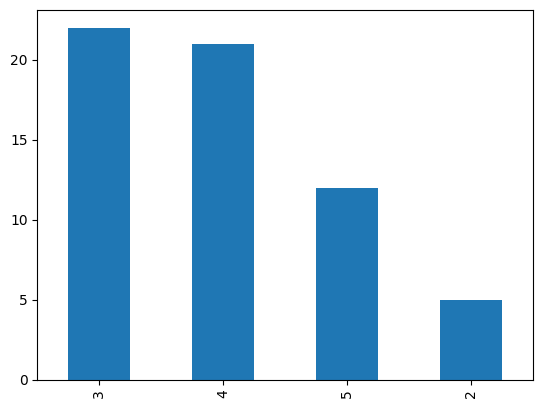

In [96]:
short_newsit_df['day'].value_counts().plot(kind='bar')

<Axes: >

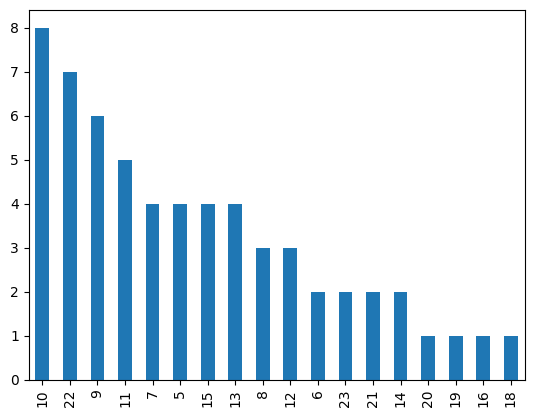

In [97]:
short_newsit_df['hour'].value_counts().plot(kind='bar')

In [98]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [99]:
short_newsit_df[short_newsit_df['day']==3]['full_text']


33    NewsIT Ελλαδα Κληρωση ΛΟΤΤΟ 2419: Αυτοι ειναι ...
34    NewsIT Ελλαδα Βρεθηκαν 80 διαβατηρια που ειχαν...
35    NewsIT Ελλαδα Ξεσπα η φυλακισμενη μητερα της 1...
36    NewsIT Ελλαδα Η ψηφιακη τεχνολογια εκπαιδευει ...
37    NewsIT Ελλαδα Ανακοινωση απο το ΕΔΥΤΑ σχετικα ...
38    NewsIT Ελλαδα Superior Taste Award: Διακριση γ...
39    NewsIT Ελλαδα Παραλιες με Γαλαζιες σημαιες κον...
40    NewsIT Ελλαδα Κληρωση ΛΟΤΤΟ 2419 σημερα Σαββατ...
41    NewsIT Ελλαδα Μεζαπος Μανης: Το δαιδαλωδες λημ...
42    NewsIT Ελλαδα «Οι Πανελληνιες συνεκτιμωνται απ...
43    NewsIT Ελλαδα Εκλογες 2023: Που ψηφιζω, τι ισχ...
44    NewsIT Ελλαδα ΔΥΠΑ: 26 βρεφονηπιακοι σταθμοι σ...
45    NewsIT Ελλαδα Βιντεο ντοκουμεντο απο τη στιγμη...
46    NewsIT Ελλαδα Πανελλαδικες 2023 Μαθηματικα ΕΠΑ...
47    NewsIT Ελλαδα Ιδεες για μονοημερη εκδρομη σε 5...
48    NewsIT Ελλαδα Θεματα Πανελληνιων 2023 ΕΠΑΛ: Τι...
49    NewsIT Ελλαδα Κοινωνικος Τουρισμος 2023: Ποτε ...
50    NewsIT Ελλαδα Συνεληφθη 36χρονος στις Αχαρ

In [100]:
text = short_newsit_df[(short_newsit_df['day'] > 3) & (short_newsit_df['day'] < 4) ]['full_text'].str.cat(sep = ' ') 

In [103]:
import spacy

In [104]:
nlp = spacy.load('el_core_news_sm')

In [105]:
list(nlp.Defaults.stop_words)[0:20]


['ήσαστε',
 'κακώς',
 'όπου',
 'πόσην',
 'ότι',
 'είθε',
 'ανάμεσα',
 'μέσα',
 'τάχατε',
 'προτού',
 'οποίες',
 'ολωσδιόλου',
 'πρόκειται',
 'ίδιους',
 'μόνο',
 'μέλει',
 'εκείνης',
 'ταύτων',
 'ακόμη',
 'εκεί']

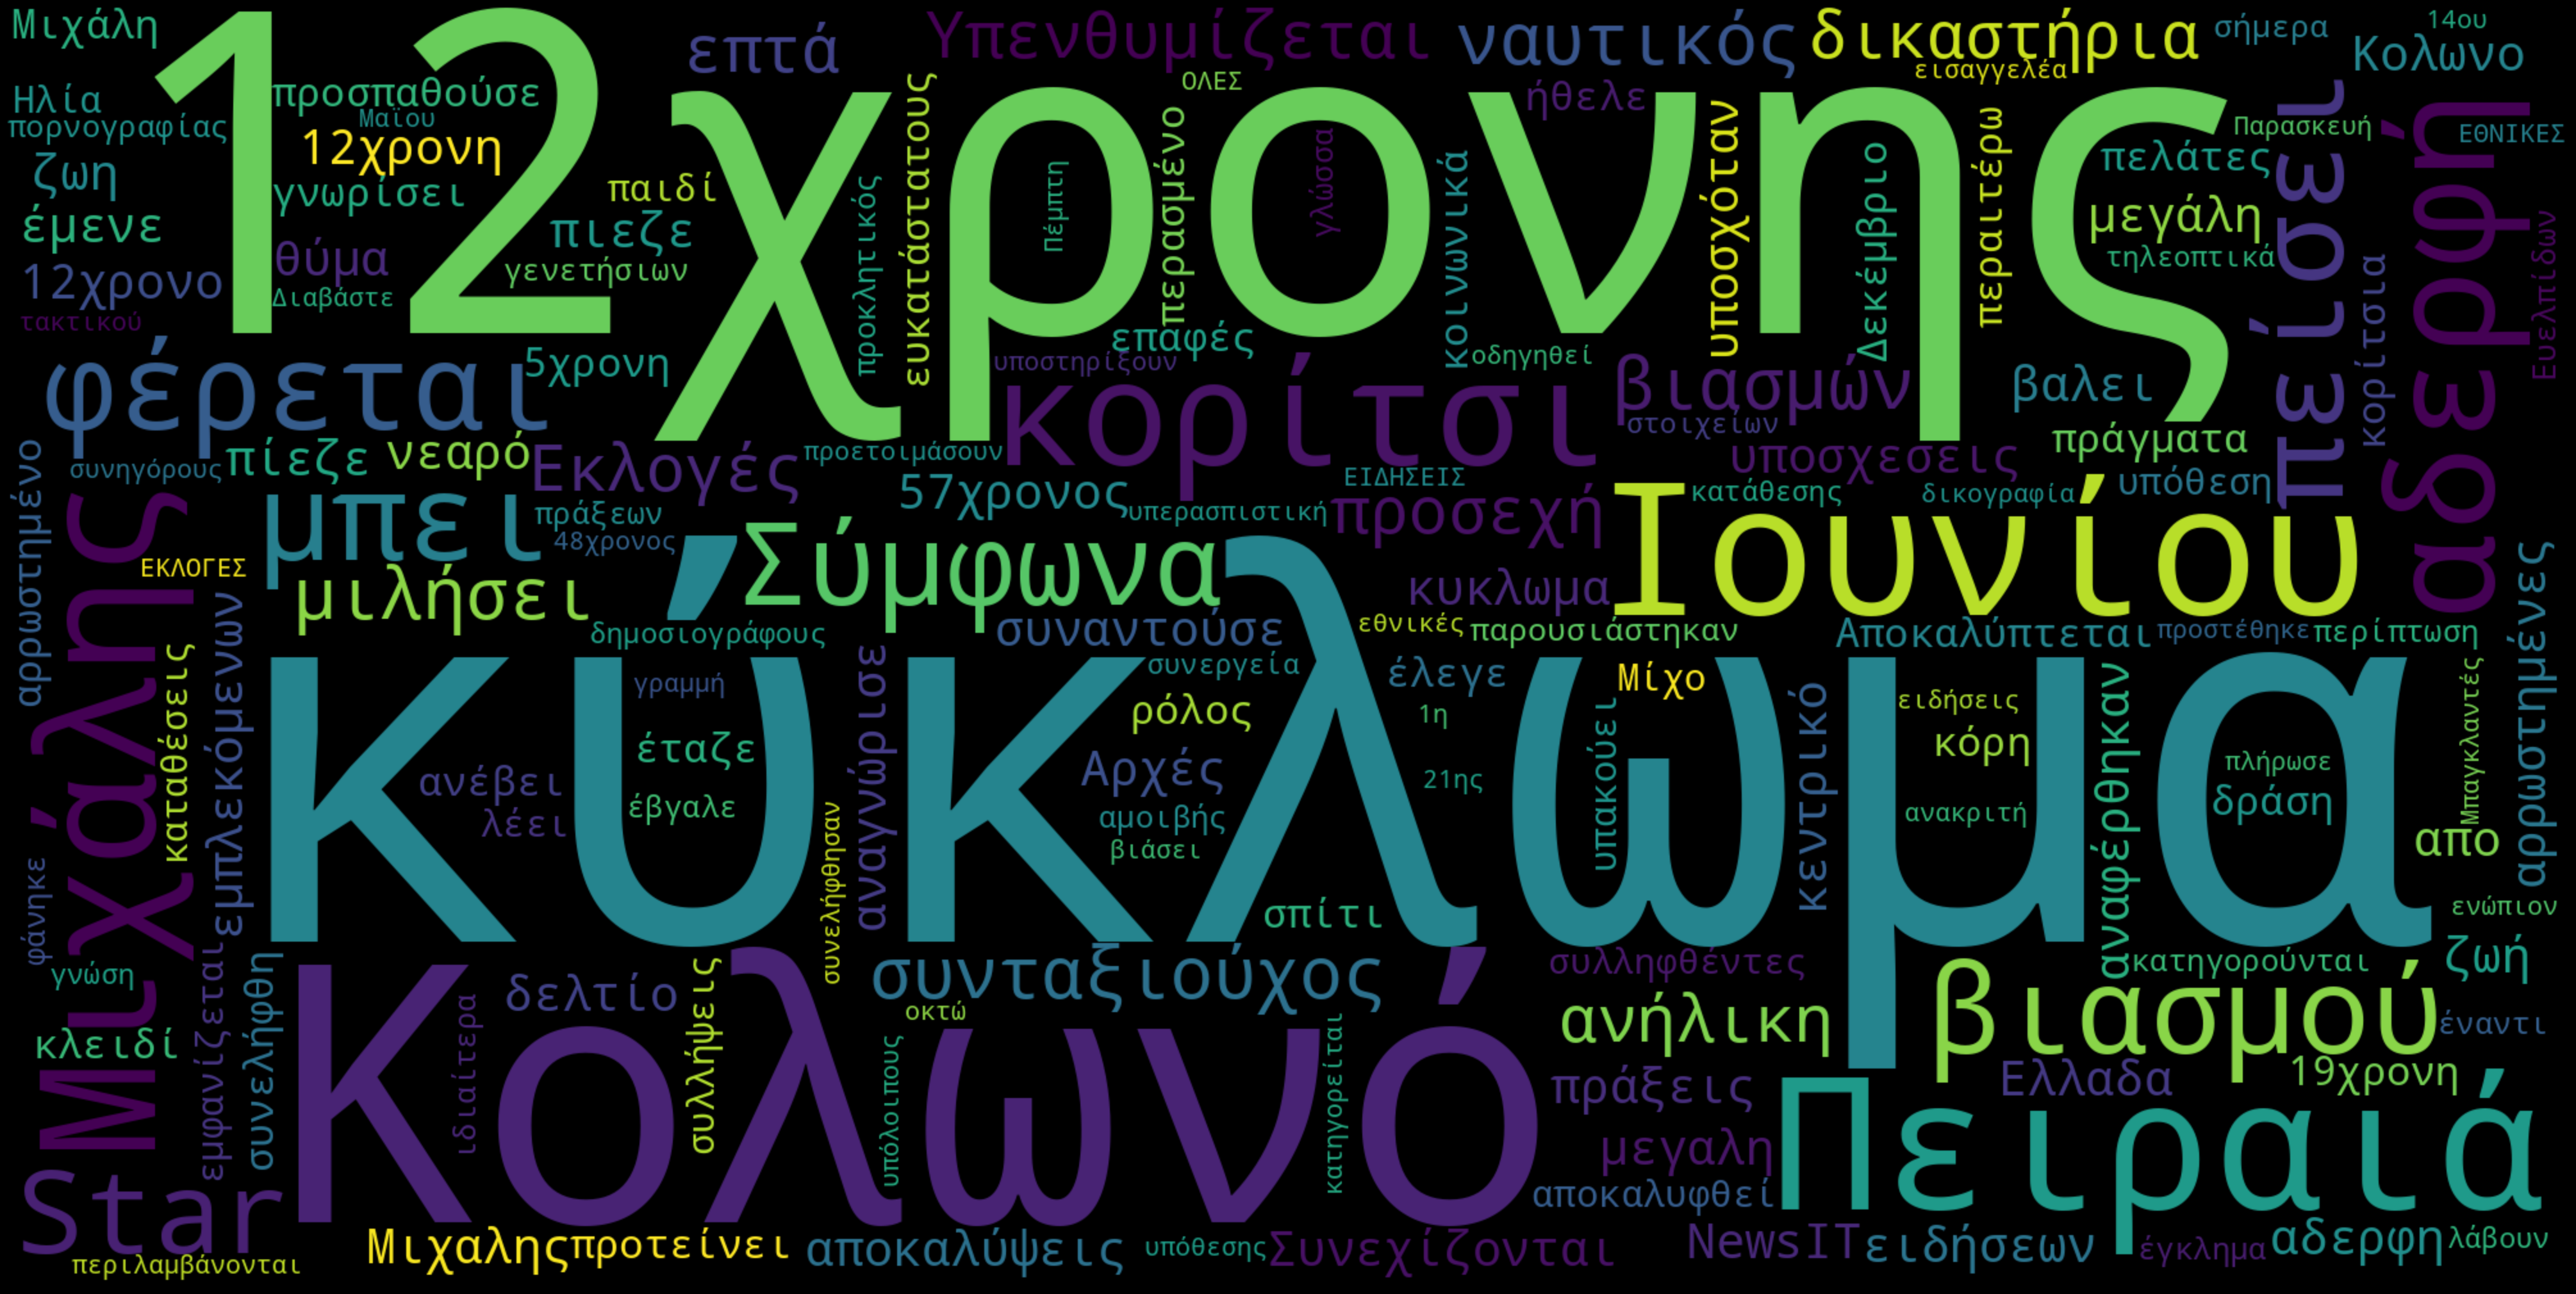

In [107]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(full_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Σύμφωνα με το συννεφόλεξο, για τις ημέρες 3-4/6/20213 στη κατηγορία του ειδησεογραφικού site «NewsIt», στη κατηγορία «Ελλάδα» αναπαρήχθησαν ειδήσεις για ποικίλα θέματα. Μερικές από τις θεματολογίες της κατηγορίας είναι οι επερχόμενες εκλογές της 25ης Ιουνίου, αλλά κατά βάση αναπαράγονται άρθρα σχετικά με την υπόθεση στον Κολωνό και το βιασμό του 12χρονου κοριτσίου.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
cv = CountVectorizer()

In [110]:
count_vector = cv.fit_transform(short_newsit_df['full_text']) 

In [111]:
count_vector.shape

(60, 5572)

In [112]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()

,00,000,01,02,03,036,04,05,06,07,...,ἐκκέχυται,ἐλέησον,ἐπιφοιτήσει,ἑνὶ,ἑορτάζομεν,ἡμέρᾳ,ἡμᾶς,ἡμῶν,ἤματι,ὀγδόῃ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [114]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [115]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()

,00,000,01,02,03,036,04,05,06,07,...,ἐκκέχυται,ἐλέησον,ἐπιφοιτήσει,ἑνὶ,ἑορτάζομεν,ἡμέρᾳ,ἡμᾶς,ἡμῶν,ἤματι,ὀγδόῃ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [117]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [118]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()

,00,000,01,02,03,036,04,05,06,07,...,ἐκκέχυται,ἐλέησον,ἐπιφοιτήσει,ἑνὶ,ἑορτάζομεν,ἡμέρᾳ,ἡμᾶς,ἡμῶν,ἤματι,ὀγδόῃ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

,000,2023,21ης,30,newsit,βαθμούς,διαβάστε,δυπα,εθνικές,εθνικες,ειδήσεις,ειδησεις,εκλογές,εκλογες,ελλαδα,ευρώ,ιουνίου,μαϊου,ολες,ώρες
0,0,3,1,1,1,0,1,0,1,1,1,1,2,1,1,0,1,1,1,0
1,0,3,1,0,1,0,1,0,1,1,1,1,2,1,1,0,0,1,1,0
2,0,3,1,0,1,0,1,0,1,1,1,1,2,1,1,0,0,1,1,0
3,8,8,1,2,1,0,1,13,1,1,1,1,2,1,1,6,0,1,1,1
4,0,27,1,10,2,0,1,0,1,1,1,1,2,1,1,0,3,1,1,0


In [121]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

,000 ευρώ,06 2023,2023 διαβάστε,2023 εκλογές,21ης μαϊου,newsit ελλαδα,απογευματινές ώρες,βαθμούς κελσίου,γενικά αίθριος,διαβάστε ειδήσεις,εθνικές εκλογές,εθνικες εκλογες,ειδήσεις εθνικές,ειδησεις εθνικες,εκλογές 2023,εκλογές 21ης,εκλογες 2023,μαϊου 2023,μποφόρ θερμοκρασία,ολες ειδησεις
0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1
1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1
2,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1
3,6,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1
4,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1


In [122]:
results.sum(axis =0).sort_values(ascending = False)

εκλογές 21ης          63
εκλογες 2023          62
εθνικές εκλογές       60
διαβάστε ειδήσεις     60
μαϊου 2023            60
εκλογές 2023          60
ειδησεις εθνικες      60
ειδήσεις εθνικές      60
εθνικες εκλογες       60
ολες ειδησεις         60
newsit ελλαδα         60
21ης μαϊου            60
2023 εκλογές          60
2023 διαβάστε         60
βαθμούς κελσίου       38
000 ευρώ              36
μποφόρ θερμοκρασία    33
γενικά αίθριος        28
06 2023               22
απογευματινές ώρες    21
dtype: int64

In [123]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

εκλογές 21ης         63
εκλογες 2023         62
εθνικές εκλογές      60
διαβάστε ειδήσεις    60
μαϊου 2023           60
dtype: int64

In [126]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['εκλογές', 'ειδήσεις', 'μαΐου'])
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

,εκλογές,ειδήσεις,μαΐου
0,2,1,1
1,2,1,0
2,2,1,1
3,2,1,0
4,2,1,0


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [128]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_newsit_df['full_text'])  

In [129]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) 
results.head()

,00,000,04,06,08,10,100,12,12χρονης,13,...,χώρο,ψηφίζεις,ψηφίζουν,ψηφιακά,ψηφοδέλτια,ψύξης,όμβροι,όμβρους,ώρα,ώρες
0,0.000000,0.000000,0.0,0.0,0.0,0.096762,0.0,0.000000,0.0,0.000000,...,0.120289,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.050271,0.0,0.0,0.100542,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.132822,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.195799,0.0,0.0,0.0,0.025933,0.0,0.082902,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.025178
4,0.023816,0.000000,0.0,0.0,0.0,0.098121,0.0,0.052280,0.0,0.028073,...,0.000000,0.0,0.0,0.030495,0.0,0.030495,0.0,0.0,0.0,0.000000


In [130]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.05676718 0.74541366 0.04874397 0.11324574 0.0633437
  0.03840332 0.05302864 0.10229093 0.09018971 0.15182333 0.01289865
  0.09910034 0.06558543 0.03823503 0.0129007  0.06279306 0.03188147
  0.08789219 0.04470708 0.35137226 0.07906034 0.09326209 0.07281574
  0.07072131 0.03473058 0.04435659 0.10718064 0.07137011 0.04659574
  0.02331748 0.12274216 0.05452283 0.03703529 0.14346816 0.15126578
  0.05816704 0.02939621 0.04319908 0.01621779 0.02372692 0.06311229
  0.07807644 0.12389252 0.05128194 0.0436292  0.09941255 0.08165497
  0.09586999 0.04291709 0.05087642 0.03527816 0.04822413 0.13186622
  0.02972888 0.06915708 0.09073533 0.14138549 0.08978954 0.07027441]]


In [131]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

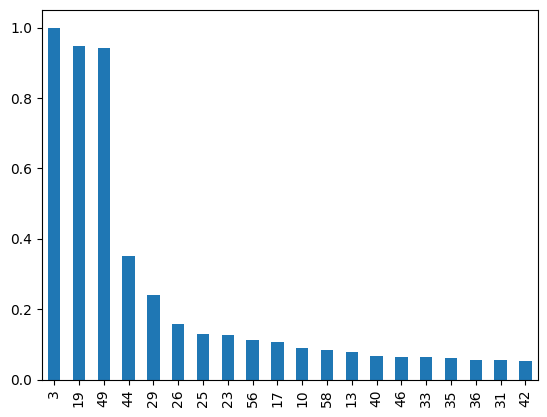

In [132]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

Σύμφωνα με το γράφημα, παρατηρούμε ότι τα δύο άρθρα που μοιάζουν περισσότερο είναι το 4ο και το 20ο.

In [134]:
short_newsit_df['full_text'].loc[3]

'NewsIT Ελλαδα Ληγει σημερα τα μεσανυχτα η προθεσμια για την υποβολη αιτησεων για το προγραμμα Κοινωνικος Τουρισμος Λίγες ώρες απομένουν ακόμα για τις αιτήσεις δικαιούχων και παρόχων για το πρόγραμμα Κοινωνικός Τουρισμός της ΔΥΠΑ, για την περίοδο 2023 – 2024. Η πλατφόρμα κλείνει σήμερα (5.6.2023) τα μεσάνυχτα με όλα τα ΑΦΜ να έχουν το δικαίωμα χθες και σήμερα να υποβάλουν αιτήσεις. Οι δικαιούχοι – ωφελούμενοι του προγράμματος Κοινωνικού Τουρισμού 2023-2024 της ΔΥΠΑ μπορούν να πραγματοποιήσουν έως έξι διανυκτερεύσεις σε τουριστικό κατάλυμα που επιλέγουν από το «Μητρώο Παρόχων» της ΔΥΠΑ, κατόπιν απευθείας συνεννόησής τους με τον πάροχο, με μικρή ιδιωτική συμμετοχή.  Ειδικά, για καταλύματα σε Λέρο, Λέσβο, Χίο, Κω και στον νομό Έβρου, μπορούν να πραγματοποιηθούν έως 10 διανυκτερεύσεις, με μηδενική ιδιωτική συμμετοχή, ενώ στα καταλύματα των Δήμων Ιστιαίας-Αιδηψού και Μαντουδίου-Λίμνης-Αγ.Άννας της Β. Εύβοιας και του Δήμου Σάμου, μπορούν να πραγματοποιηθούν έως 12 διανυκτερεύσεις εντελώς δωρ

In [135]:
short_newsit_df['full_text'].loc[19]

'NewsIT Ελλαδα Κοινωνικος Τουρισμος 2023: Μεχρι τα μεσανυχτα της Δευτερας ανοιχτη η πλατφορμα για ολους τους ΑΦΜ Ανοιχτή για λίγες μόλις ώρες η ειδική πλατφόρμα για τις αιτήσεις δικαιούχων και παρόχων για το πρόγραμμα Κοινωνικού Τουρισμού\xa0της\xa0ΔΥΠΑ, για την περίοδο 2023 – 2024.\xa0 Φέτος το πρόγραμμα «Κοινωνικός Τουρισμός» θα ξεκινήσει ένα μήνα νωρίτερα, την 1η Ιουλίου 2023 αντί για 1η Αυγούστου. Η πλατφόρμα της ΔΥΠΑ «άνοιξε» το πρωί της Τρίτης και θα είναι ανοιχτή μέχρι το βράδυ της Δευτέρας 05/06/2023.  Η πλατφόρμα για το πρόγραμμα Κοινωνικός Τουρισμός της ΔΥΠΑ είναι ανοιχτή σήμερα 04.06.2023 και αύριο, Δευτέρα 05.06.2023 για την υποβολή αιτήσεων από όλους τους ενδιαφερομένους, ανεξαρτήτως του τελευταίου ψηφίου του ΑΦΜ. Δικαιούχοι του προγράμματος Κοινωνικός Τουρισμός της ΔΥΠΑ είναι:  Το εισόδημα των δικαιούχων όλων των κατηγοριών\xa0δεν πρέπει να ξεπερνά τα 30.000 ευρώ, εκτός αν πρόκειται για μακροχρόνια ανέργους,\xa0οι οποίοι αν είναι άγαμοι πρέπει να έχουν εισόδημα έως 16.000

In [136]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

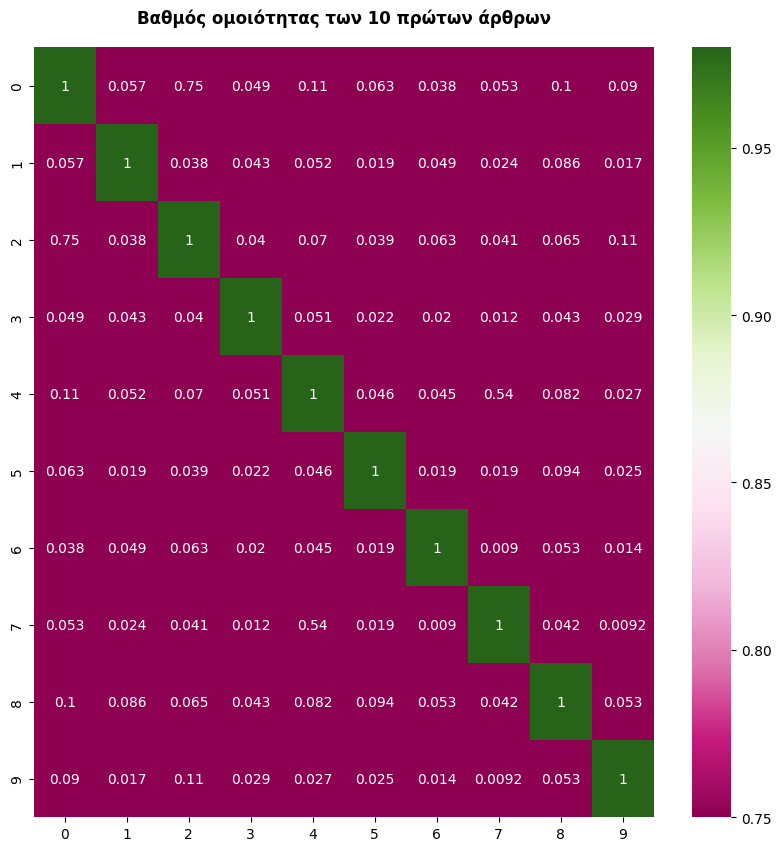

In [141]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') 
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')